# California Housing Price Prediction


In [51]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error ,r2_score


In [52]:
house = fetch_california_housing()

X =house.data
y =house.target
feature_names = house.feature_names

df =pd.DataFrame(X ,columns = feature_names)

In [53]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [54]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [56]:
data_befor_cleaning = df
target_befor_cleaning = y

In [57]:
df['Target'] =y
# df.head(2)

# Exploratory Data Analysis (EDA)


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

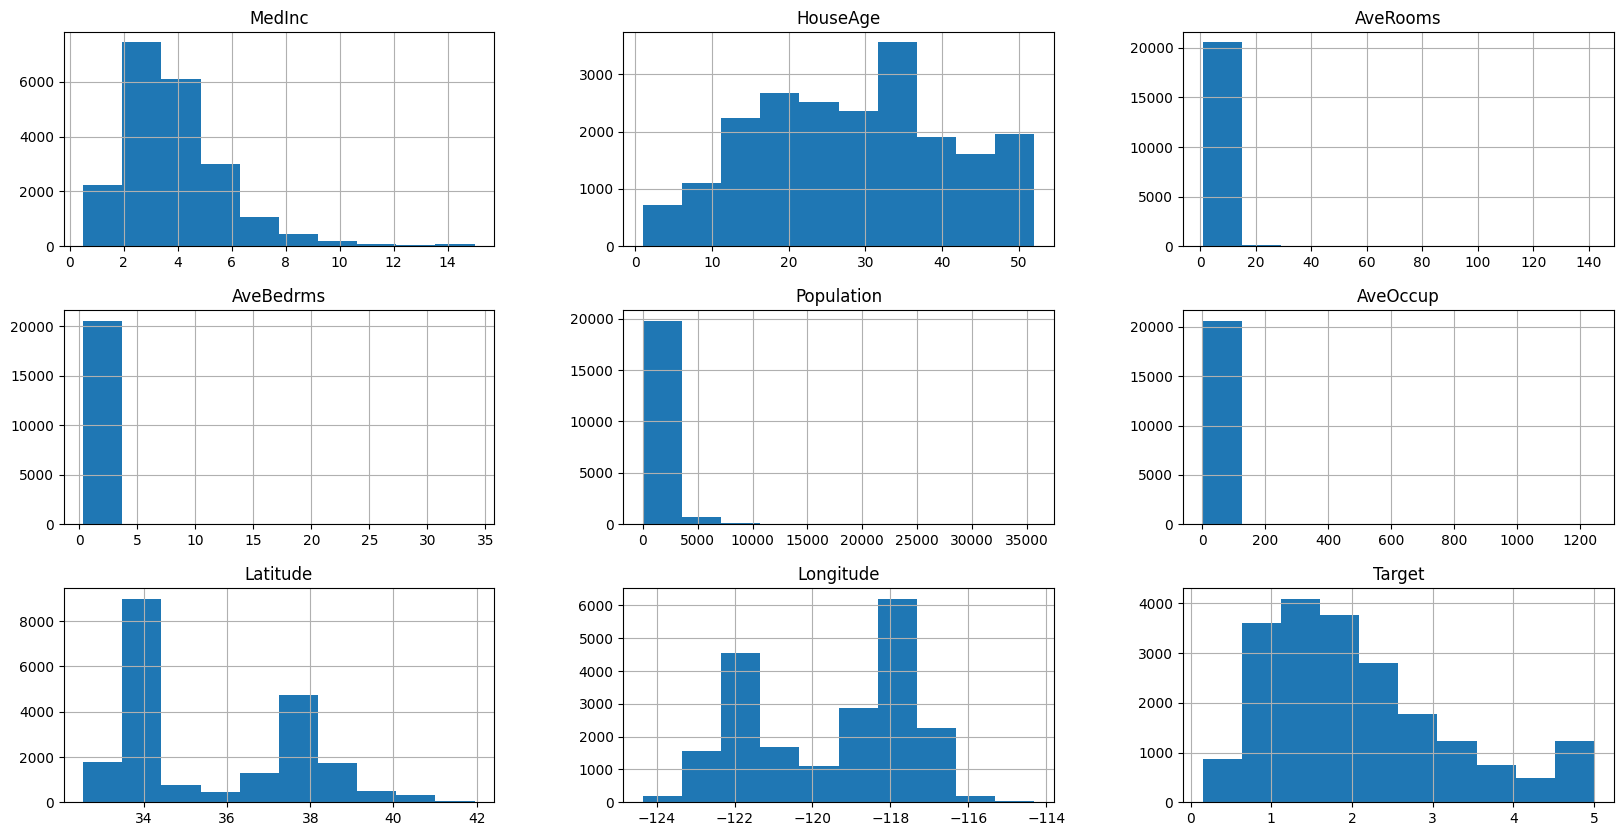

In [58]:
df.hist(figsize=(20,10))

<Axes: >

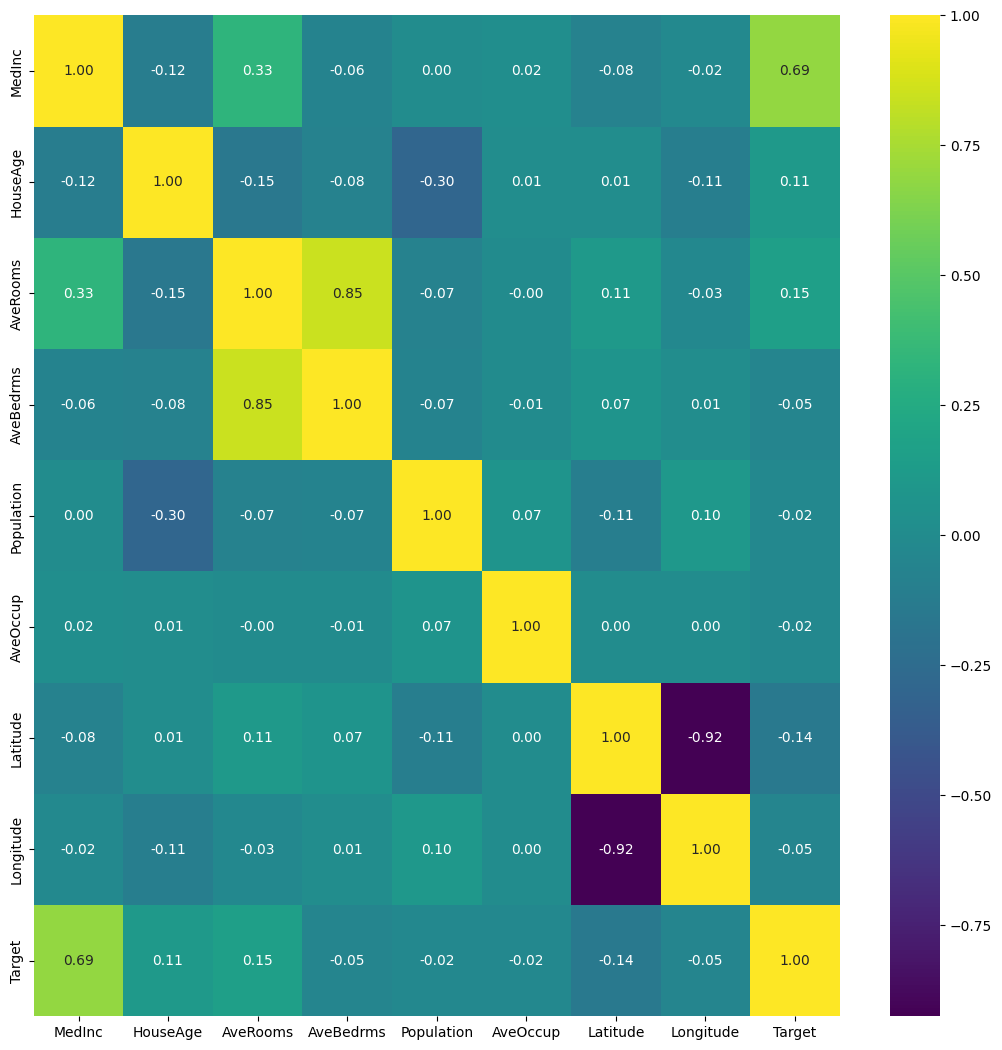

In [59]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr() ,annot= True,fmt='.02f',cmap='viridis')

In [60]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Data Cleaning


In [61]:
mask =df[df['AveRooms'] >20].index
# print(mask)
df.drop(mask ,inplace=True)
df[df['AveRooms'] >20]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target


In [62]:
df.drop(columns='AveBedrms',inplace=True )

In [63]:
mask =df[df['Population']>8000].index

df.drop(mask,inplace=True)
df[df['Population']>8000]

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Target


In [64]:
mask =df[df['AveOccup']>10].index

df.drop(mask,inplace=True)
df[df['AveOccup']>10]

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Target


# Final Model Insights:

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

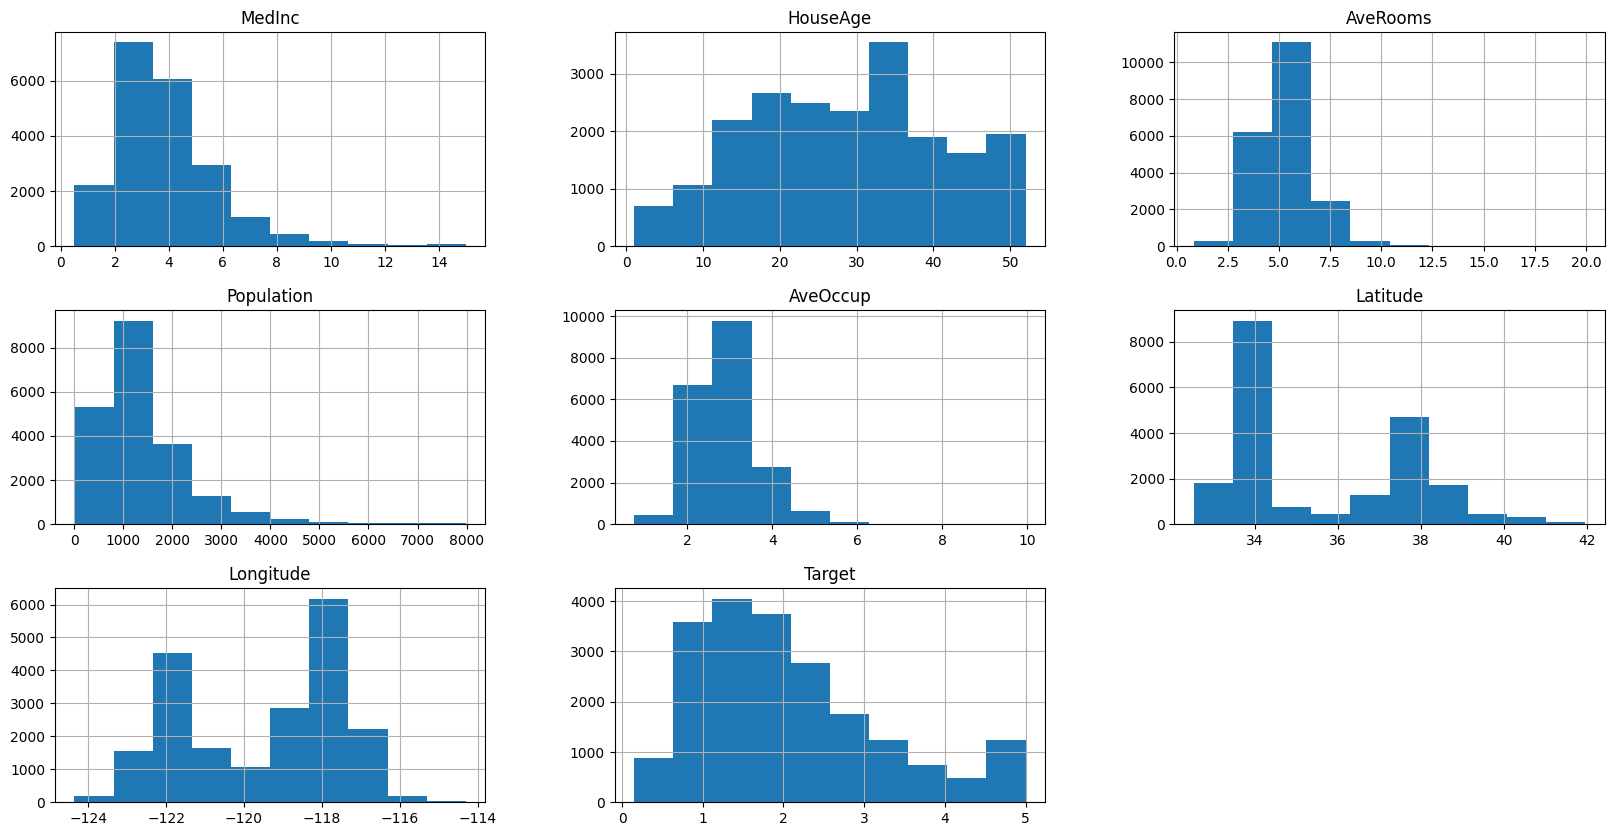

In [65]:
df.hist(figsize=(20,10))

In [66]:
y =df['Target']
df['Target'].index
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20476, dtype: float64

In [67]:
df.drop(columns='Target',inplace=True)

# Model Training & Pipeline

In [68]:
# Split Data
X_train ,X_test ,y_train ,y_test = train_test_split(df,y,test_size=0.2 ,random_state=42)

#Scale Data
scale =StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

#Feature Selection
select =SelectKBest(k=7)
X_train_select =select.fit_transform(X_train_scale,y_train)
X_test_select = select.transform(X_test_scale)

#Choose Model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train_select,y_train)
y_predict =model.predict(X_test_select)

#Error
mean_error = mean_absolute_error(y_test,y_predict)
median_error = median_absolute_error(y_test,y_predict)
R2_score = r2_score(y_test,y_predict)

# Feature Importance Insight

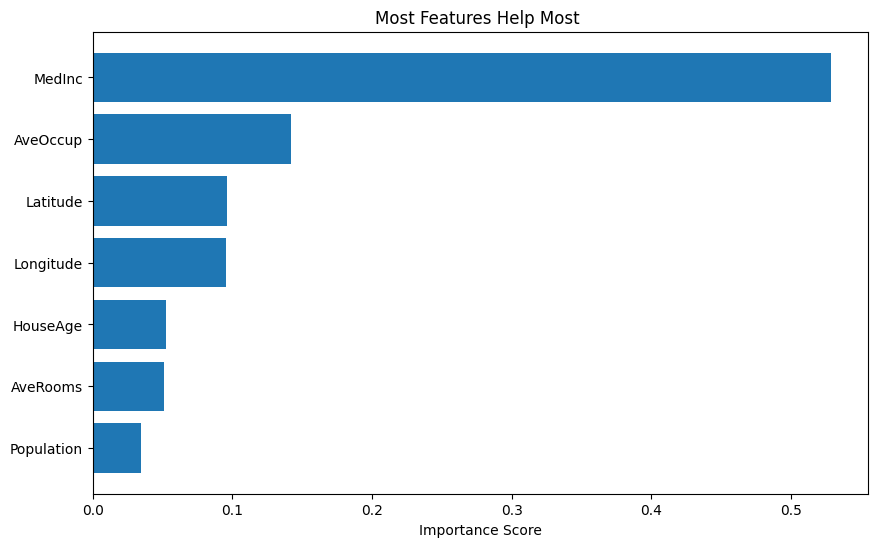

In [69]:
importance = model.feature_importances_
df_feature_importance =pd.DataFrame({'Features':df.columns ,'Importance':importance})
sorted_df_feature_importance = df_feature_importance.sort_values(by ='Importance',ascending=False)

plt.figure(figsize=(10,6))
plt.barh(sorted_df_feature_importance['Features'],sorted_df_feature_importance['Importance'])
plt.title('Most Features Help Most ')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()


# Model Evaluation

In [70]:
print(f'Mean Error : {mean_error}')
print(f'Median Error : {median_error}')
print(f'Score of Model : {R2_score}')

#Without Feature Selection
# Mean Error : 0.3203320456911803
# Median Error : 0.1986100000000004
# Score of Model : 0.8261014147075577

#With Feature Selection
# Mean Error : 0.3203320456911803
# Median Error : 0.1986100000000004
# Score of Model : 0.8261014147075577



Mean Error : 0.3159644358154299
Median Error : 0.20056500000000033
Score of Model : 0.8233025569553146


# With Feature Selection

In [71]:
#Feature Selection
select =SelectKBest(k=7)
X_train_select =select.fit_transform(X_train_scale,y_train)
X_test_select = select.transform(X_test_scale)

#Choose Model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train_select,y_train)
y_predict =model.predict(X_test_select)

print(f'Mean Error : {mean_error}')
print(f'Median Error : {median_error}')
print(f'Score of Model : {R2_score}')

print("Final Verdict: Feature selection confirmed that all 7 variables are essential. Model Stability: 100%")

Mean Error : 0.3159644358154299
Median Error : 0.20056500000000033
Score of Model : 0.8233025569553146
Final Verdict: Feature selection confirmed that all 7 variables are essential. Model Stability: 100%
